# The Holy Quran ( Arabic ), Tashkeel Removal, word count, and comparing  different  Stopwords and Stemmers.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
quran_original = pd.read_csv('../input/the-holy-quran/Arabic-Original.csv',header=None)

In [3]:
quran_original.head()

,0
0,1|1|بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ
1,1|2|الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ
2,1|3|الرَّحْمَٰنِ الرَّحِيمِ
3,1|4|مَالِكِ يَوْمِ الدِّينِ
4,1|5|إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ


In [4]:
quran = quran_original[0].str.split('|', expand = True)

In [5]:
quran.columns = ['surah','ayah','text']

In [6]:
from nltk.tokenize import RegexpTokenizer

In [7]:
def tashkeel_remover(word) :
    """
    Function to remove tshkeel from a word.
    The input is a single word with tshkeel, and 
    the output is a single word without tashkeel.
    """
    tokenizer = RegexpTokenizer('[ء-ي]')
    tokens = tokenizer.tokenize(word)
    word_no_tashkeel = ''.join(tokens)
    return(word_no_tashkeel) 

In [8]:
quran['tokinized_text'] = [ i.split(' ') for i in quran['text']]
quran['text_no_tashkeel'] = [[tashkeel_remover(word) for word in ayah]for ayah in quran['tokinized_text']]
quran['clean_text'] = quran['text_no_tashkeel'].apply(lambda i : ' '.join(i))

In [9]:
quran.head()

,surah,ayah,text,tokinized_text,text_no_tashkeel,clean_text
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,"[بِسْمِ, اللَّهِ, الرَّحْمَٰنِ, الرَّحِيمِ]","[بسم, الله, الرحمن, الرحيم]",بسم الله الرحمن الرحيم
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"[الْحَمْدُ, لِلَّهِ, رَبِّ, الْعَالَمِينَ]","[الحمد, لله, رب, العالمين]",الحمد لله رب العالمين
2,1,3,الرَّحْمَٰنِ الرَّحِيمِ,"[الرَّحْمَٰنِ, الرَّحِيمِ]","[الرحمن, الرحيم]",الرحمن الرحيم
3,1,4,مَالِكِ يَوْمِ الدِّينِ,"[مَالِكِ, يَوْمِ, الدِّينِ]","[مالك, يوم, الدين]",مالك يوم الدين
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"[إِيَّاكَ, نَعْبُدُ, وَإِيَّاكَ, نَسْتَعِينُ]","[إياك, نعبد, وإياك, نستعين]",إياك نعبد وإياك نستعين


In [10]:
quran['ayah_words'] = quran['text_no_tashkeel'].apply(lambda i : len(i))
quran['ayah_letters_with_tashkeel'] = quran['text'].apply(lambda i : len(i))
quran['ayah_letters'] = quran['clean_text'].apply(lambda i : len(i))
quran['ayah_letters_no_spaces'] = quran['ayah_letters'] - (quran['ayah_words'] - 1)
quran['mean_letters/word'] = quran['ayah_letters_no_spaces'] / quran['ayah_words']

In [11]:
quran.head()

,surah,ayah,text,tokinized_text,text_no_tashkeel,clean_text,ayah_words,ayah_letters_with_tashkeel,ayah_letters,ayah_letters_no_spaces,mean_letters/word
0,1,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,"[بِسْمِ, اللَّهِ, الرَّحْمَٰنِ, الرَّحِيمِ]","[بسم, الله, الرحمن, الرحيم]",بسم الله الرحمن الرحيم,4,38,22,19,4.75
1,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"[الْحَمْدُ, لِلَّهِ, رَبِّ, الْعَالَمِينَ]","[الحمد, لله, رب, العالمين]",الحمد لله رب العالمين,4,37,21,18,4.50
2,1,3,الرَّحْمَٰنِ الرَّحِيمِ,"[الرَّحْمَٰنِ, الرَّحِيمِ]","[الرحمن, الرحيم]",الرحمن الرحيم,2,23,13,12,6.00
3,1,4,مَالِكِ يَوْمِ الدِّينِ,"[مَالِكِ, يَوْمِ, الدِّينِ]","[مالك, يوم, الدين]",مالك يوم الدين,3,23,14,12,4.00
4,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"[إِيَّاكَ, نَعْبُدُ, وَإِيَّاكَ, نَسْتَعِينُ]","[إياك, نعبد, وإياك, نستعين]",إياك نعبد وإياك نستعين,4,40,22,19,4.75


In [12]:
quran[quran['surah']=='2']['text'][4:5]

11    أُولَٰئِكَ عَلَىٰ هُدًى مِنْ رَبِّهِمْ ۖ وَأُو...
Name: text, dtype: object

In [13]:
words_by_surah = quran.groupby('surah').agg({'ayah_words':'sum'}).reset_index()

In [14]:
words_by_surah.columns = ['surah', 'surah_words']

In [15]:
words_by_surah

,surah,surah_words
0,1,29
1,10,1963
2,100,44
3,101,40
4,102,32
...,...,...
109,95,38
110,96,77
111,97,34
112,98,102


In [16]:
quran.describe()

,ayah_words,ayah_letters_with_tashkeel,ayah_letters,ayah_letters_no_spaces,mean_letters/word
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,13.249519,111.491501,65.622996,53.373477,4.185758
std,10.310090,84.366030,49.879799,39.705801,0.667846
min,1.000000,3.000000,3.000000,3.000000,2.250000
25%,6.000000,50.000000,29.000000,24.000000,3.750000
50%,11.000000,91.000000,53.000000,44.000000,4.083333
75%,17.000000,146.000000,86.000000,70.000000,4.534615
max,145.000000,1184.000000,695.000000,551.000000,9.000000


In [17]:
quran_by_surah = quran[['surah','clean_text']]

In [18]:
quran_by_surah.head()

,surah,clean_text
0,1,بسم الله الرحمن الرحيم
1,1,الحمد لله رب العالمين
2,1,الرحمن الرحيم
3,1,مالك يوم الدين
4,1,إياك نعبد وإياك نستعين


In [19]:
surah_list = []
for i in quran_by_surah['surah'].unique():
    surah_list.append(list(quran_by_surah[quran_by_surah['surah'] == i]['clean_text']))

In [20]:
quran_df = pd.DataFrame()
quran_df['surah'] = quran_by_surah['surah'].unique()
quran_df['text'] = surah_list

In [21]:
quran_df['clean_text'] = quran_df['text'].apply(lambda i : ' '.join(i))

In [22]:
#fetched from https://en.wikipedia.org/wiki/Meccan_surah
makki_surah_list = [96, 68, 73, 74, 1, 111, 81, 87, 92, 89, 93, 94, 103, 100, 108, 102, 107, 109, 105, 113, 114,
                  112, 53, 80, 97, 91, 85, 95, 106, 101,75, 104, 77, 50, 90, 86, 54, 38, 7, 72, 36, 25, 35, 19,
                  20, 56, 26, 27, 28, 17, 10, 11, 12, 15, 6, 37, 31, 34, 39, 40, 41, 42, 43, 44, 45, 46, 51, 88,
                  18, 16, 71, 14, 21, 23, 32, 52, 67, 69, 70, 78, 79, 82, 84, 30, 29, 83]

In [23]:
quran_df['makki'] = [1 if int(i) in makki_surah_list else 0 for i in quran_df['surah']]

In [24]:
quran_df['ayahs'] = quran_df['text'].apply(lambda i : len(i))

In [25]:
quran_df['suras_letters'] = quran_df['clean_text'].apply(lambda i : len(i))

In [26]:
quran_df

,surah,text,clean_text,makki,ayahs,suras_letters
0,1,"[بسم الله الرحمن الرحيم, الحمد لله رب العالمين...",بسم الله الرحمن الرحيم الحمد لله رب العالمين ا...,1,7,171
1,2,"[بسم الله الرحمن الرحيم الم, ذلك الكتاب لا ريب...",بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب ...,0,286,32882
2,3,"[بسم الله الرحمن الرحيم الم, الله لا إله إلا ه...",بسم الله الرحمن الرحيم الم الله لا إله إلا هو ...,0,200,18714
3,4,[بسم الله الرحمن الرحيم يا أيها الناس اتقوا رب...,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربك...,0,176,20372
4,5,[بسم الله الرحمن الرحيم يا أيها الذين آمنوا أو...,بسم الله الرحمن الرحيم يا أيها الذين آمنوا أوف...,0,120,15267
...,...,...,...,...,...,...
109,110,[بسم الله الرحمن الرحيم إذا جاء نصر الله والفت...,بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح...,0,3,122
110,111,"[بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب, م...",بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما ...,1,5,126
111,112,"[بسم الله الرحمن الرحيم قل هو الله أحد, الله ا...",بسم الله الرحمن الرحيم قل هو الله أحد الله الص...,1,4,84
112,113,"[بسم الله الرحمن الرحيم قل أعوذ برب الفلق, من ...",بسم الله الرحمن الرحيم قل أعوذ برب الفلق من شر...,1,5,118


In [27]:
df_quran = quran_df.merge(words_by_surah)

In [28]:
df_quran

,surah,text,clean_text,makki,ayahs,suras_letters,surah_words
0,1,"[بسم الله الرحمن الرحيم, الحمد لله رب العالمين...",بسم الله الرحمن الرحيم الحمد لله رب العالمين ا...,1,7,171,29
1,2,"[بسم الله الرحمن الرحيم الم, ذلك الكتاب لا ريب...",بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب ...,0,286,32882,6615
2,3,"[بسم الله الرحمن الرحيم الم, الله لا إله إلا ه...",بسم الله الرحمن الرحيم الم الله لا إله إلا هو ...,0,200,18714,3711
3,4,[بسم الله الرحمن الرحيم يا أيها الناس اتقوا رب...,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربك...,0,176,20372,4022
4,5,[بسم الله الرحمن الرحيم يا أيها الذين آمنوا أو...,بسم الله الرحمن الرحيم يا أيها الذين آمنوا أوف...,0,120,15267,3043
...,...,...,...,...,...,...,...
109,110,[بسم الله الرحمن الرحيم إذا جاء نصر الله والفت...,بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح...,0,3,122,24
110,111,"[بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب, م...",بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما ...,1,5,126,27
111,112,"[بسم الله الرحمن الرحيم قل هو الله أحد, الله ا...",بسم الله الرحمن الرحيم قل هو الله أحد الله الص...,1,4,84,19
112,113,"[بسم الله الرحمن الرحيم قل أعوذ برب الفلق, من ...",بسم الله الرحمن الرحيم قل أعوذ برب الفلق من شر...,1,5,118,27


In [29]:
df_quran['surah_letters_no_spaces'] = df_quran['suras_letters'] - (df_quran['surah_words'] - 1)

In [30]:
df_quran

,surah,text,clean_text,makki,ayahs,suras_letters,surah_words,surah_letters_no_spaces
0,1,"[بسم الله الرحمن الرحيم, الحمد لله رب العالمين...",بسم الله الرحمن الرحيم الحمد لله رب العالمين ا...,1,7,171,29,143
1,2,"[بسم الله الرحمن الرحيم الم, ذلك الكتاب لا ريب...",بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب ...,0,286,32882,6615,26268
2,3,"[بسم الله الرحمن الرحيم الم, الله لا إله إلا ه...",بسم الله الرحمن الرحيم الم الله لا إله إلا هو ...,0,200,18714,3711,15004
3,4,[بسم الله الرحمن الرحيم يا أيها الناس اتقوا رب...,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربك...,0,176,20372,4022,16351
4,5,[بسم الله الرحمن الرحيم يا أيها الذين آمنوا أو...,بسم الله الرحمن الرحيم يا أيها الذين آمنوا أوف...,0,120,15267,3043,12225
...,...,...,...,...,...,...,...,...
109,110,[بسم الله الرحمن الرحيم إذا جاء نصر الله والفت...,بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح...,0,3,122,24,99
110,111,"[بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب, م...",بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما ...,1,5,126,27,100
111,112,"[بسم الله الرحمن الرحيم قل هو الله أحد, الله ا...",بسم الله الرحمن الرحيم قل هو الله أحد الله الص...,1,4,84,19,66
112,113,"[بسم الله الرحمن الرحيم قل أعوذ برب الفلق, من ...",بسم الله الرحمن الرحيم قل أعوذ برب الفلق من شر...,1,5,118,27,92


In [31]:
df_quran['mean_letters/word'] = df_quran['surah_letters_no_spaces'] / df_quran['surah_words']

In [32]:
df_quran

,surah,text,clean_text,makki,ayahs,suras_letters,surah_words,surah_letters_no_spaces,mean_letters/word
0,1,"[بسم الله الرحمن الرحيم, الحمد لله رب العالمين...",بسم الله الرحمن الرحيم الحمد لله رب العالمين ا...,1,7,171,29,143,4.931034
1,2,"[بسم الله الرحمن الرحيم الم, ذلك الكتاب لا ريب...",بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب ...,0,286,32882,6615,26268,3.970975
2,3,"[بسم الله الرحمن الرحيم الم, الله لا إله إلا ه...",بسم الله الرحمن الرحيم الم الله لا إله إلا هو ...,0,200,18714,3711,15004,4.043115
3,4,[بسم الله الرحمن الرحيم يا أيها الناس اتقوا رب...,بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربك...,0,176,20372,4022,16351,4.065390
4,5,[بسم الله الرحمن الرحيم يا أيها الذين آمنوا أو...,بسم الله الرحمن الرحيم يا أيها الذين آمنوا أوف...,0,120,15267,3043,12225,4.017417
...,...,...,...,...,...,...,...,...,...
109,110,[بسم الله الرحمن الرحيم إذا جاء نصر الله والفت...,بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح...,0,3,122,24,99,4.125000
110,111,"[بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب, م...",بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما ...,1,5,126,27,100,3.703704
111,112,"[بسم الله الرحمن الرحيم قل هو الله أحد, الله ا...",بسم الله الرحمن الرحيم قل هو الله أحد الله الص...,1,4,84,19,66,3.473684
112,113,"[بسم الله الرحمن الرحيم قل أعوذ برب الفلق, من ...",بسم الله الرحمن الرحيم قل أعوذ برب الفلق من شر...,1,5,118,27,92,3.407407


In [33]:
df_quran.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            104, 105, 106, 107, 108, 109, 110, 111, 112, 113],
           dtype='int64', length=114)

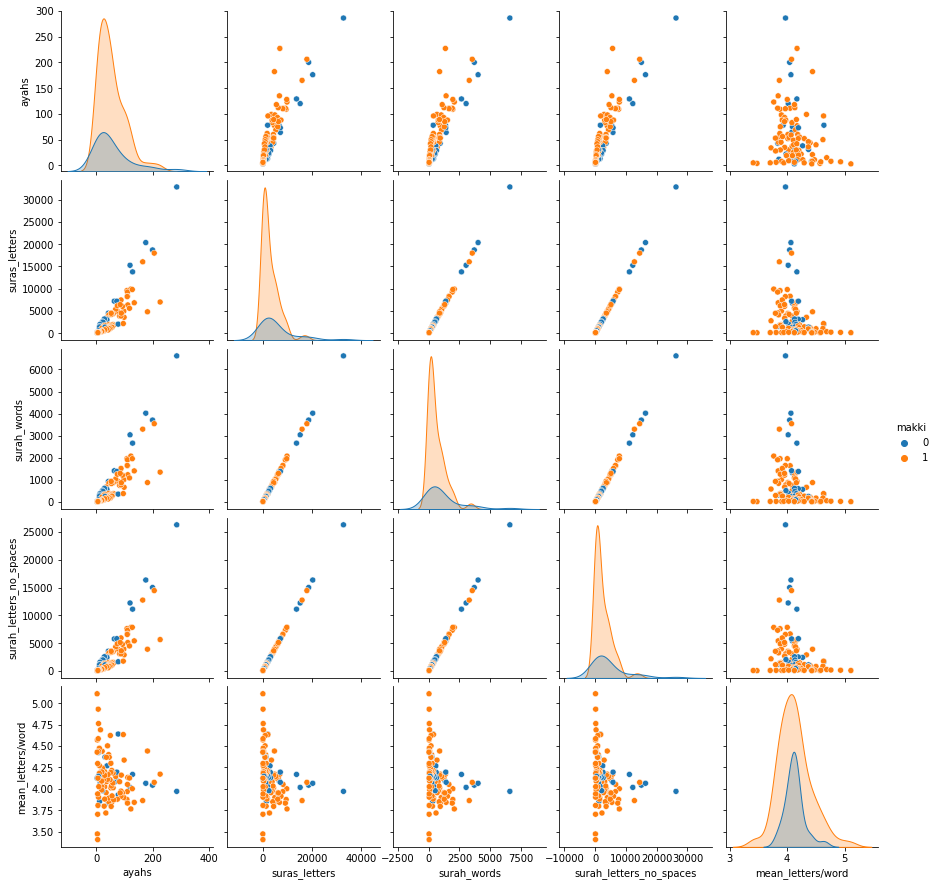

In [34]:
# fig = plt.figure(figsize=(10,10))
sns.pairplot(df_quran,hue='makki')

In [35]:
df_quran.describe()

,makki,ayahs,suras_letters,surah_words,surah_letters_no_spaces,mean_letters/word
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.754386,54.701754,3643.394737,724.771930,2919.622807,4.125431
std,0.432351,53.213367,4994.228773,1000.725481,3993.935501,0.264935
min,0.000000,3.000000,75.000000,14.000000,62.000000,3.407407
25%,1.000000,15.500000,503.000000,97.500000,406.500000,3.958862
50%,1.000000,39.000000,1833.000000,356.000000,1470.000000,4.109730
75%,1.000000,77.750000,4737.500000,933.750000,3829.750000,4.202778
max,1.000000,286.000000,32882.000000,6615.000000,26268.000000,5.111111


In [36]:
quran.describe()

,ayah_words,ayah_letters_with_tashkeel,ayah_letters,ayah_letters_no_spaces,mean_letters/word
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,13.249519,111.491501,65.622996,53.373477,4.185758
std,10.310090,84.366030,49.879799,39.705801,0.667846
min,1.000000,3.000000,3.000000,3.000000,2.250000
25%,6.000000,50.000000,29.000000,24.000000,3.750000
50%,11.000000,91.000000,53.000000,44.000000,4.083333
75%,17.000000,146.000000,86.000000,70.000000,4.534615
max,145.000000,1184.000000,695.000000,551.000000,9.000000


In [37]:
quran.corr()

,ayah_words,ayah_letters_with_tashkeel,ayah_letters,ayah_letters_no_spaces,mean_letters/word
ayah_words,1.000000,0.989463,0.989511,0.983395,-0.302973
ayah_letters_with_tashkeel,0.989463,1.000000,0.999315,0.998448,-0.205608
ayah_letters,0.989511,0.999315,1.000000,0.999296,-0.203533
ayah_letters_no_spaces,0.983395,0.998448,0.999296,1.000000,-0.177015
mean_letters/word,-0.302973,-0.205608,-0.203533,-0.177015,1.000000


In [38]:
df_quran.corr()

,makki,ayahs,suras_letters,surah_words,surah_letters_no_spaces,mean_letters/word
makki,1.000000,-0.035138,-0.251364,-0.245369,-0.252839,0.002314
ayahs,-0.035138,1.000000,0.877275,0.873532,0.878118,-0.168230
suras_letters,-0.251364,0.877275,1.000000,0.999655,0.999978,-0.256194
surah_words,-0.245369,0.873532,0.999655,1.000000,0.999460,-0.267782
surah_letters_no_spaces,-0.252839,0.878118,0.999978,0.999460,1.000000,-0.253262
mean_letters/word,0.002314,-0.168230,-0.256194,-0.267782,-0.253262,1.000000


In [39]:
quran_to_word = []
for i in quran['text_no_tashkeel']:
    for c in i:
        quran_to_word.append(c)
        

In [40]:
len(quran_to_word)

82624

In [41]:
quran_to_word.count('')

4379

In [42]:
countofwords = {i: quran_to_word.count(i) for i in quran_to_word}

In [43]:
del countofwords['']

In [44]:
word_count = pd.DataFrame()
word_count['word'] = countofwords.keys()
word_count['freq'] = countofwords.values()

In [45]:
word_count.sort_values('freq',ascending=False, inplace=True)

In [46]:
word_count.head(20)

,word,freq
46,من,2763
1,الله,2265
86,في,1185
137,ما,1010
56,إن,966
29,لا,812
19,الذين,810
52,على,670
83,إلا,664
24,ولا,658


In [47]:
# stopwords

In [48]:
pip install tashaphyne


     |████████████████████████████████| 244 kB 4.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install Arabic-Stopwords

     |████████████████████████████████| 353 kB 4.4 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [50]:
from tashaphyne import stopwords as tashstopwords
from nltk.corpus import stopwords as nltkstopwords
import arabicstopwords.arabicstopwords as stp

In [51]:
#https://github.com/mohataher/arabic-stop-words
stopWords = open("../input/aranizi-dailect-training-data/arabicstopwords.txt").read().splitlines()

In [52]:
print('Number of Arabic stopwords in NLTK package:            ',len(nltkstopwords.words('arabic')))
print('Number of Arabic stopwords from github.com/mohataher:  ',len(stopWords))
print('Number of Arabic stopwords in Tashphyne package:       ',len(tashstopwords.STOPWORDS.keys()))
print('Number of Arabic stopwords in arabicstopwords package: ',len(stp.STOPWORDS.keys()))

Number of Arabic stopwords in NLTK package:             248
Number of Arabic stopwords from github.com/mohataher:   750
Number of Arabic stopwords in Tashphyne package:        10339
Number of Arabic stopwords in arabicstopwords package:  13629


In [53]:
def stopword_remover(text_list ,stopword_lib):
    text_no_stop = [word for word in text_list if not word in stopword_lib]
    print('Original word count: ',len(text_list))
    print('No stopwords count: ' ,len(text_no_stop))

In [54]:
stopwords_list = [('NLTK', nltkstopwords.words('arabic')),
                  ('mohataher', stopWords),
                  ('tash', tashstopwords.STOPWORDS.keys()),
                  ('stp', stp.STOPWORDS.keys())]

In [55]:
for name, stop in stopwords_list:
    print(name)
    stopword_remover(quran_to_word,stop)

NLTK
Original word count:  82624
No stopwords count:  59517
mohataher
Original word count:  82624
No stopwords count:  61244
tash
Original word count:  82624
No stopwords count:  52819
stp
Original word count:  82624
No stopwords count:  52508


In [56]:
text_no_stop_NLTK = [word for word in quran_to_word if not word in nltkstopwords.words('arabic')]
text_no_stop_mohataher = [word for word in quran_to_word if not word in stopWords]
text_no_stop_tash = [word for word in quran_to_word if not word in tashstopwords.STOPWORDS.keys()]
text_no_stop_stp = [word for word in quran_to_word if not word in stp.STOPWORDS.keys()]

In [57]:
from tashaphyne.stemming import ArabicLightStemmer
import pyarabic.arabrepr
arepr = pyarabic.arabrepr.ArabicRepr() 
repr = arepr.repr
ArListem = ArabicLightStemmer()

In [58]:
from nltk.stem.isri import ISRIStemmer
isrst = ISRIStemmer()

In [59]:
pip install snowballstemmer

     |████████████████████████████████| 93 kB 1.1 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [60]:
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")

In [61]:
len(text_no_stop_stp)

52508

In [62]:
len(np.unique(text_no_stop_stp))

13992

In [63]:
stemmed_words_tash = [ArListem.light_stem(i) for i in np.unique(text_no_stop_stp)]
stemmed_words_nltk_isrst = [isrst.stem(i) for i in np.unique(text_no_stop_stp)]
# stemmed_words_nltk_arlstem = [arlstem.stem(i) for i in np.unique(text_no_stop_stp)]
stemmed_words_ar_stemmer = [ar_stemmer.stemWord(i) for i in np.unique(text_no_stop_stp)]

In [64]:
stemmed_text = pd.DataFrame()
stemmed_text['original'] = np.unique(text_no_stop_stp)
stemmed_text['tash'] = stemmed_words_tash
stemmed_text['nltk_isrst'] = stemmed_words_nltk_isrst
# stemmed_text['nltk_arlstem'] = stemmed_words_nltk_arlstem
stemmed_text['ar_stemmer'] = stemmed_words_ar_stemmer

In [65]:
stemmed_text.iloc[0:50]

,original,tash,nltk_isrst,ar_stemmer
0,,,,
1,آباء,آباء,ابء,اباء
2,آباءكم,آباءكم,ابء,اباء
3,آباءنا,آباءن,ابء,اباء
4,آباءهم,آباءهم,ابء,اباء
5,آباؤكم,آباؤكم,ابؤ,اباء
6,آباؤنا,آباؤن,ابؤ,اباء
7,آباؤهم,آباؤهم,ابؤ,اباء
8,آبائك,آبائك,بئك,اباء
9,آبائكم,آبائكم,ابئ,اباء


In [66]:
word_counts_with_stem = {i:len(stemmed_text[i].unique()) for i in stemmed_text.columns}
word_counts_with_stem

{'original': 13992, 'tash': 4693, 'nltk_isrst': 4203, 'ar_stemmer': 7045}